In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
for filename in os.listdir('/kaggle/input/nudtsirst/Sample_1'):
    print(filename)

In [42]:
df = pd.read_csv('/kaggle/input/nudtsirst/nudtsirst/Sample_2/Sample_2.csv')
mock_str = df.head(1).iloc[:,0].item()
mock_str = mock_str.replace('\\','/').replace('datasets/data','/kaggle/input/nudtsirst')
mock_str

'/kaggle/input/nudtsirst/nudtsirst/Sample_2/frame_0000.png'

In [44]:
x = df.head(1).iloc[:,1].item()
y = df.head(1).iloc[:,2].item()
w = df.head(1).iloc[:,3].item()
h = df.head(1).iloc[:,4].item()
x,y,w,h

(1199, 699, 5, 5)

In [48]:
mock_str = df.iloc[50,0].replace('\\','/').replace('datasets/data','/kaggle/input/nudtsirst')
x = df.iloc[50,1].item()
y = df.iloc[50,2].item()
w = df.iloc[50,3].item()
h = df.iloc[50,4].item()
x,y,w,h

(1144, 652, 5, 5)

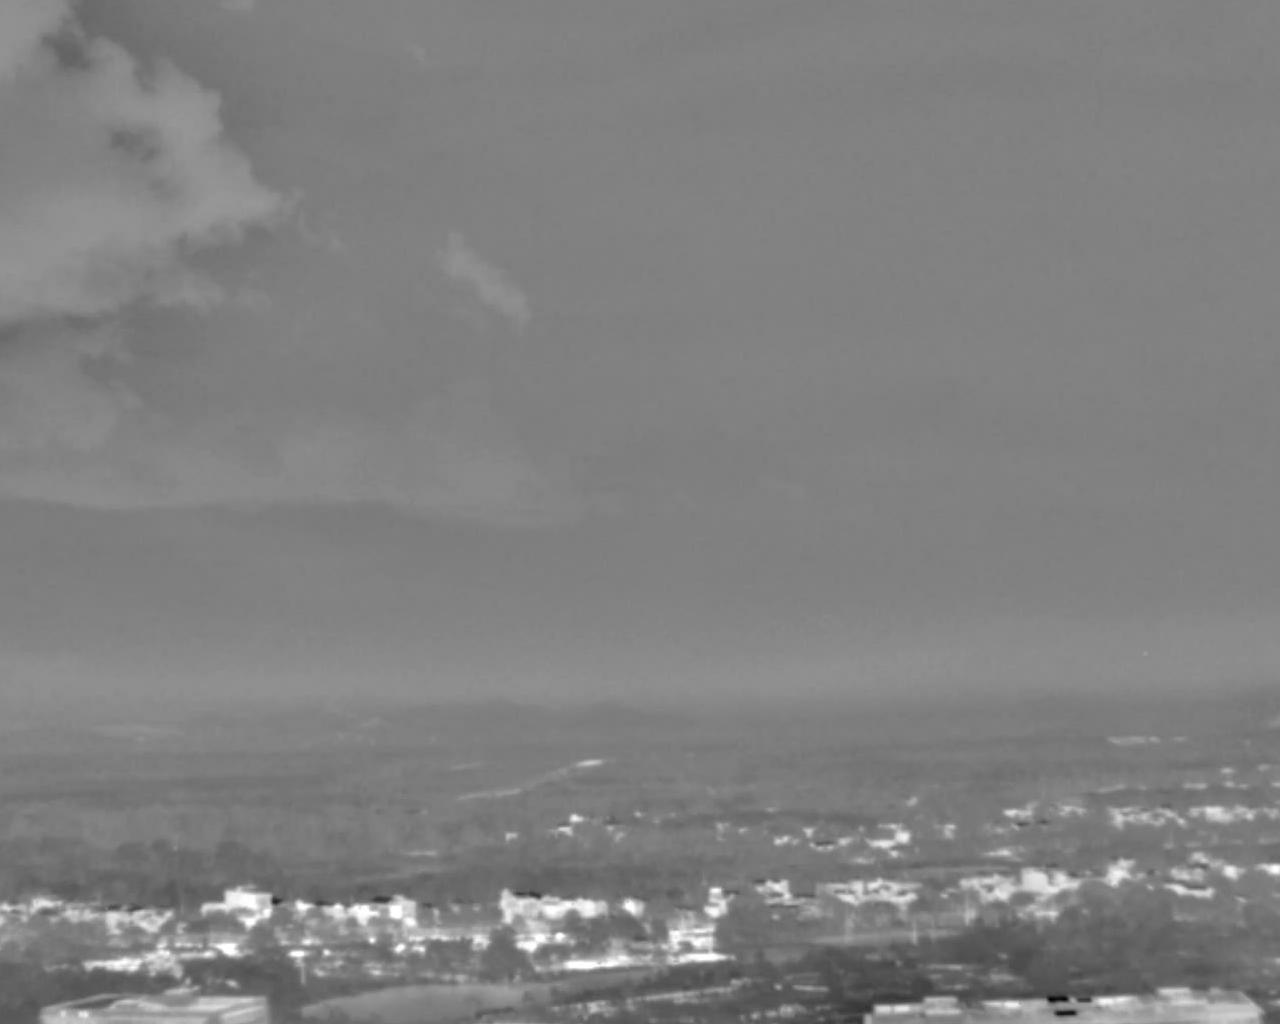

In [49]:
from PIL import Image
Image.open(mock_str)

(1024, 1280, 3)


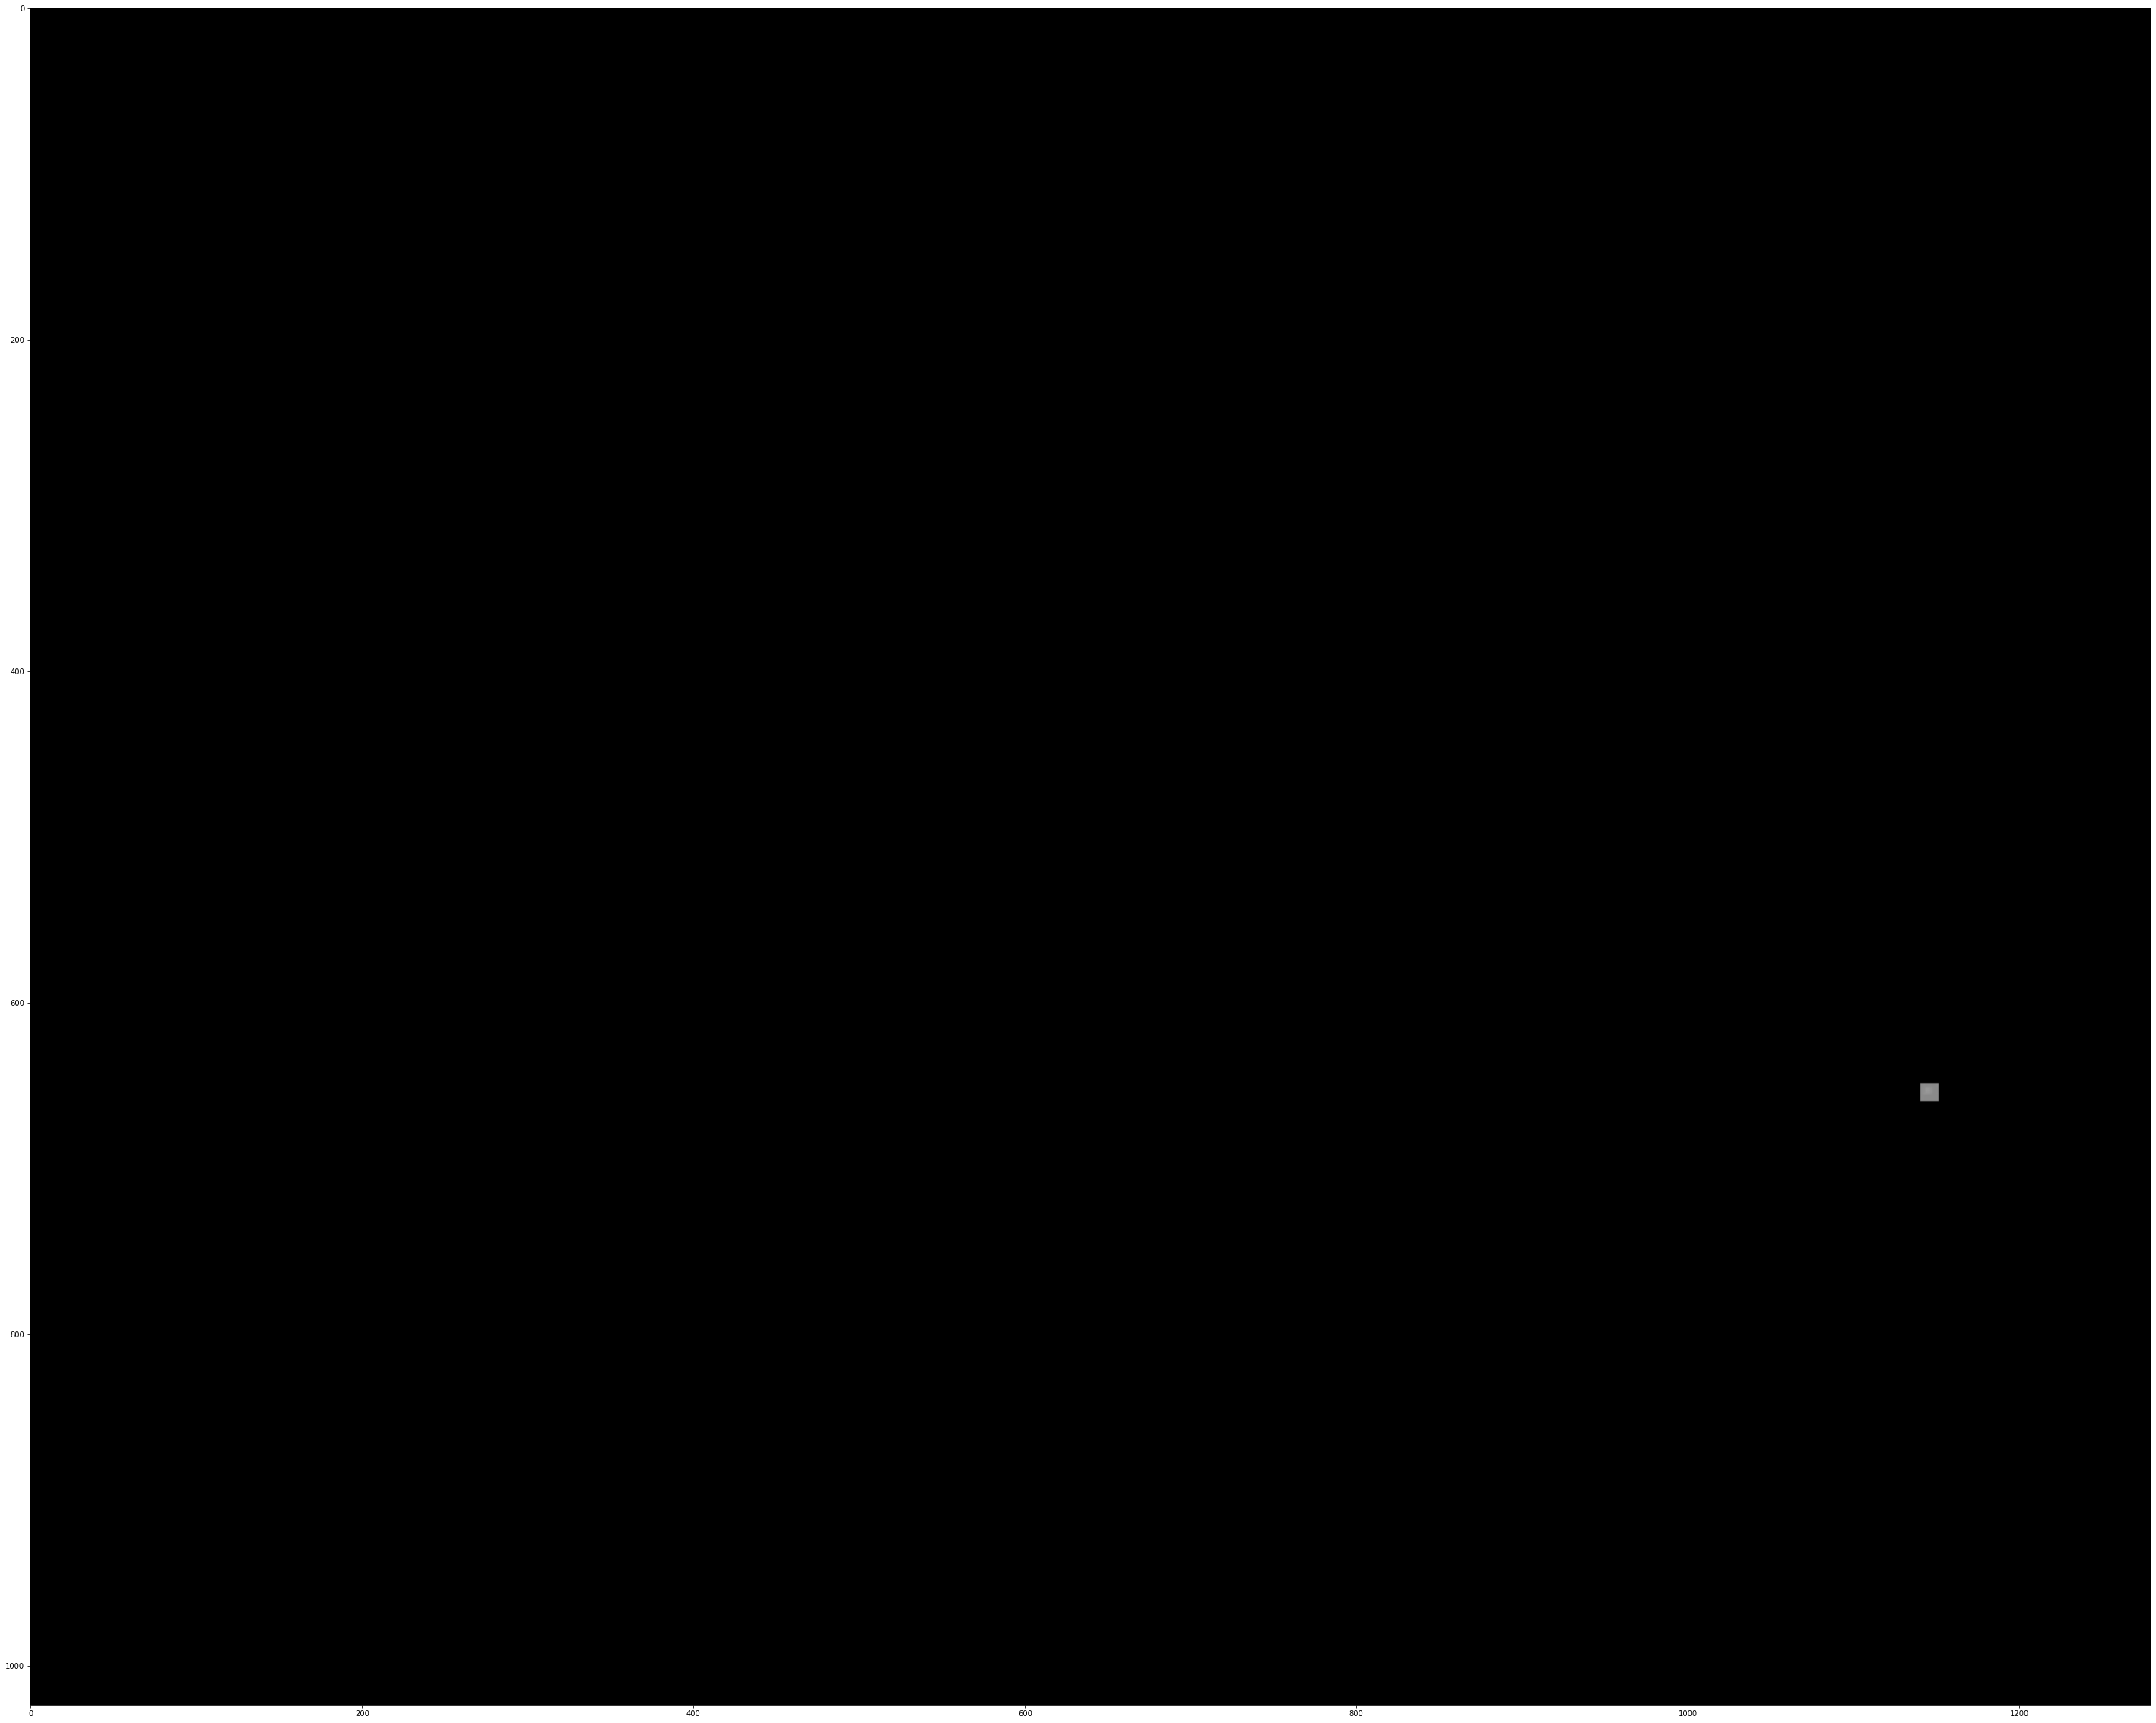

In [50]:
img = cv2.imread(mock_str)
imgw, imgh = img.shape[1], img.shape[0]

mask = np.zeros((imgh, imgw))
mask[y-3:y+h+3, x-3:x+w+3] = 1
mask = np.uint8(mask)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
print(mask.shape)
# mask.astype(np.uint8)
imgthrough = img*mask
plt.figure(figsize = (50,50))

plt.imshow(imgthrough)
# print(mask.shape, img.shape)

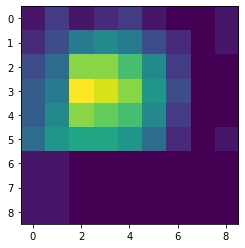

In [54]:
plt.imshow(imgthrough[y-2:y+h+2, x-2:x+w+2,0])

# MAIN FRAME EXTRACTOR MODULE

In [4]:
folders = []
for folder in sorted(os.listdir('/kaggle/input/nudtsirst/nudtsirst')):
    if folder.startswith('Sample'):
        folders.append(folder)

In [7]:
for folder in folders:
    try:
        os.mkdir('/kaggle/working/mask')
    except:
        pass
    try:
        os.mkdir(f'/kaggle/working/mask/{folder}')
    except:
        pass
    df = pd.read_csv(f'/kaggle/input/nudtsirst/nudtsirst/{folder}/{folder}.csv')
    for line in range(len(df)):
        mock_str = df.iloc[line,0].replace('\\','/').replace('datasets/data','/kaggle/input/nudtsirst')
        x = df.iloc[line,1].item()
        y = df.iloc[line,2].item()
        w = df.iloc[line,3].item()
        h = df.iloc[line,4].item()
        
        img = cv2.imread(mock_str)
        imgw, imgh = img.shape[1], img.shape[0]

        mask = np.zeros((imgh, imgw))
        mask[y-1:y+h-1, x-1:x+h-1] = 255
        mask = np.uint8(mask)
        mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
        cv2.imwrite(f'/kaggle/working/mask/{folder}/{mock_str[-14:]}', mask)
    print(f'{folder}_done!')

Sample_1_done!
Sample_10_done!
Sample_11_done!
Sample_12_done!
Sample_13_done!
Sample_14_done!
Sample_15_done!
Sample_16_done!
Sample_17_done!
Sample_18_done!
Sample_19_done!
Sample_2_done!
Sample_20_done!
Sample_21_done!
Sample_22_done!
Sample_23_done!
Sample_24_done!
Sample_25_done!
Sample_26_done!
Sample_27_done!
Sample_28_done!
Sample_29_done!
Sample_3_done!
Sample_30_done!
Sample_31_done!
Sample_32_done!
Sample_33_done!
Sample_34_done!
Sample_35_done!
Sample_36_done!
Sample_37_done!
Sample_38_done!
Sample_39_done!
Sample_4_done!
Sample_40_done!
Sample_43_done!
Sample_44_done!
Sample_45_done!
Sample_46_done!
Sample_47_done!
Sample_48_done!
Sample_49_done!
Sample_5_done!
Sample_50_done!
Sample_51_done!
Sample_52_done!
Sample_53_done!
Sample_54_done!
Sample_55_done!
Sample_56_done!
Sample_57_done!
Sample_58_done!
Sample_59_done!
Sample_6_done!
Sample_60_done!
Sample_7_done!
Sample_8_done!
Sample_9_done!


In [8]:
import shutil
shutil.make_archive('mask', 'zip', '/kaggle/working/mask')

'/kaggle/working/mask.zip'